In [1]:
import networkx as nx
import pickle
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly_express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode()

In [2]:
# load a list of graphs

def pick_connected_component_new(G):
    print('in pick connected component new')
    #print(G.number_of_nodes())
    print(type(G))
    #adj_list = G.adjacency_list()
    #print(adj_list)
    #print(len(adj_list))
    for id,adj in G.adjacency():
        # print('adj:', adj)
        # print('in for of pcc')
        id_min = min(adj)
        # print('id_min: ', id_min)
        if id<id_min and id>=1:
        # if id<id_min and id>=4:
            break
    node_list = list(range(id)) # only include node prior than node "id"
    print(type(node_list))
    G = G.subgraph(node_list)
    G = max(nx.connected_component_subgraphs(G), key=len)
    return G

def load_graph_list(fname,is_real=True):
    # print('in load graph list')
    with open(fname, "rb") as f:
        graph_list = pickle.load(f)
        #print(type(graph_list))
    for i in range(len(graph_list)):
        #print('in for')
        #print(type(graph_list[i]))
        edges_with_selfloops = list(graph_list[i].selfloop_edges())
        #print(len(edges_with_selfloops))

        if len(edges_with_selfloops)>0:
            #print('pass 1')
            graph_list[i].remove_edges_from(edges_with_selfloops)
        if is_real:
            #print('is real')
            graph_list[i] = max(nx.connected_component_subgraphs(graph_list[i]), key=len)
            graph_list[i] = nx.convert_node_labels_to_integers(graph_list[i])
        else:
            graph_list[i] = pick_connected_component_new(graph_list[i])

    return graph_list

In [3]:
test_path = "/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_test_0.dat"
test_graphs = load_graph_list(test_path)

In [4]:
len(test_graphs)

170

In [5]:
pred_graphs = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_pred_2600_1.dat")

In [6]:
len(pred_graphs)

1024

In [7]:
G =pred_graphs[0]

In [8]:
list(G.degree)

[(0, 4),
 (1, 9),
 (2, 8),
 (3, 7),
 (4, 3),
 (5, 5),
 (6, 5),
 (7, 9),
 (8, 5),
 (9, 5),
 (10, 6),
 (11, 4),
 (12, 5),
 (13, 4),
 (14, 4),
 (15, 4),
 (16, 6),
 (17, 3),
 (18, 3),
 (19, 3)]

In [9]:
node_list, deg_list =[],[]
for i in G.degree:
    node,deg= i
    node_list.append(node)
    deg_list.append(deg)

In [10]:
import pandas as pd
df = pd.DataFrame()

In [11]:
df['node']=node_list

In [12]:
df['degree']= deg_list

In [13]:
df.head()

node  degree
0     0       4
1     1       9
2     2       8
3     3       7
4     4       3

In [3]:
import random
import numpy as np

def find_nearest_idx(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

def clean_graphs(graph_real, graph_pred):
    ''' Selecting graphs generated that have the similar sizes.
    It is usually necessary for GraphRNN-S version, but not the full GraphRNN model.
    '''
    random.shuffle(graph_real)
    random.shuffle(graph_pred)

    # get length
    real_graph_len = np.array([len(graph_real[i]) for i in range(len(graph_real))])
    pred_graph_len = np.array([len(graph_pred[i]) for i in range(len(graph_pred))])

    # select pred samples
    # The number of nodes are sampled from the similar distribution as the training set
    pred_graph_new = []
    pred_graph_len_new = []
    for value in real_graph_len:
        pred_idx = find_nearest_idx(pred_graph_len, value)
        pred_graph_new.append(graph_pred[pred_idx])
        pred_graph_len_new.append(pred_graph_len[pred_idx])

    return graph_real, pred_graph_new

In [17]:
graph_test, graph_pred = clean_graphs(test_graphs, pred_graphs)

In [18]:
print(len(graph_test),len(graph_pred))

170 170


In [19]:
c=0
for g in graph_test:
    if len(g.nodes())==19:
        c+=1
        
print(c)

10


In [24]:
# c=0
# for g in graph_pred:
#     if len(g.nodes())==20:
#         c+=1
        
# print(c)
clean_test, clean_pred=[],[]

for g in graph_pred:
    if len(g.nodes())==20:
        clean_pred.append(g)
        
for g in graph_test:
    if len(g.nodes())==20:
        clean_test.append(g)

In [25]:
# new_test=[]
# for graph in test_graphs:
    
#     if len(graph.nodes()) == 20:
#         new_test.append(graph)
# print(len(new_test))
print(len(clean_test), len(clean_pred))

10 10


In [26]:
# new_pred=[]
# for graph in pred_graphs:
    
#     if len(graph.nodes()) == 20:
#         new_pred.append(graph)
# print(len(new_pred))

In [27]:
node_test, deg_test =[],[]
for G in clean_test:
    for i in G.degree:
        node,deg= i
        node_test.append(node)
        deg_test.append(deg)

In [28]:
node_pred, deg_pred =[],[]
#pred_sample = random.sample(clean_pred, k=10)
for G in clean_pred:
    for i in G.degree:
        node,deg= i
        node_pred.append(node)
        deg_pred.append(deg)

In [29]:
# print(len(deg_test),len(deg_pred))

In [30]:
#hist_data = [deg_test,deg_pred]

In [31]:
dist_df = pd.DataFrame()
dist_df['Real'] = deg_test
dist_df['GraphRNN'] = deg_pred

In [32]:
dist_df.head()

Real  GraphRNN
0     4         3
1     5         7
2     5         7
3    10         8
4     3         6

In [4]:
import matplotlib.pyplot as plt

In [34]:
fig = ff.create_distplot([dist_df[c] for c in dist_df.columns],["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

# fig = ff.create_distplot(hist_data,["Real","GraphRNN"],show_hist=False)
# fig['layout'].update(title='Degree Distribution')
# iplot(fig)

In [420]:
graph_test, graph_pred = clean_graphs(test_graphs, pred_graphs)
deg_pred =[]
#graphs_pred = random.choices(clean_pred, k=400)
for G in graph_pred:
    for i in G.degree:
        _,deg= i
        deg_pred.append(deg)
        
deg_test =[]
for G in graph_test:
    for i in G.degree:
        _,deg= i
        deg_test.append(deg)
        
hist_data= [deg_test,deg_pred]

group_labels = ['Real', 'GraphRNN']
#colors = ['#333F44', '#37AA9C', '#94F3E4']
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
# Add title
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [414]:
# take 160 graphs with only 19 nodes ; leaving out 20 node graphs
pred_19=[]
for g in graph_pred:
    if len(g.nodes())==19:
        pred_19.append(g)

In [382]:
deg_pred_19 =[]
#graphs_pred = random.choices(clean_pred, k=400)
for G in pred_19:
    for i in G.degree:
        _,deg= i
        deg_pred_19.append(deg)

In [383]:
hist_data= [deg_test,deg_pred]

In [384]:
group_labels = ['Real', 'GraphRNN']
#colors = ['#333F44', '#37AA9C', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

# Add title
fig['layout'].update(title='Degree Distribution')

# fig.add_trace(go.Box(
#     y=[2.37, 2.16, 4.82, 1.73, 1.04, 0.23, 1.32, 2.91, 0.11, 4.51, 0.51, 3.75, 1.35, 2.98, 4.50, 0.18, 4.66, 1.30, 2.06, 1.19],
#     name='Only Mean',
#     marker_color='darkblue',
#     boxmean=True # represent mean
# ))
iplot(fig)

In [98]:
len(graphs_pred)

400

# Clustering Coefficient

In [356]:
for i in range(len(graph_pred)):
    clustering_coeff_real = list(nx.clustering(graph_test[i]).values())
    clustering_coeff_pred = list(nx.clustering(graph_pred[i]).values())

In [357]:
print(len(clustering_coeff_pred),len(clustering_coeff_real))

19 9


In [353]:
len(graph_pred)

170

In [358]:
cluster_hist = [clustering_coeff_real,clustering_coeff_pred]

In [330]:
df_clustering = pd.DataFrame()

In [331]:
df_clustering['Real']= clustering_coeff_real
df_clustering['GraphRNN'] = clustering_coeff_pred

ValueError: Length of values does not match length of index

In [253]:
df_clustering.head()

Real  GraphRNN
0  0.333333  0.666667
1  0.333333  0.666667
2  0.321429  0.500000
3  0.227273  0.533333
4  0.321429  0.380952

In [254]:
fig = ff.create_distplot([df_clustering[c] for c in df_clustering.columns],["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Clustering Coefficient')
iplot(fig)

In [280]:
#sampling function with means
deg_list=[]
graphs_list=[]
mean_deg =[]
for i in range(40):
    graphs = random.sample(new_pred, k=10)
    for g in graphs:
        for deg in g.degree:
            _,degree= deg
            
            # node_list.append(node)
            deg_list.append(degree)

for j in range(20):
    sum_= 0      
    mean = 0
    for k in range(j+20,8000,20):
        sum_+= deg_list[j] + deg_list[k]
    mean = sum_/400
    mean_deg.append(mean)
    
print(len(mean_deg))
print(mean_deg)
        

20
[8.3875, 8.9075, 12.9875, 10.0175, 10.4125, 9.2575, 10.2875, 9.2275, 11.3875, 14.2425, 14.6375, 9.495, 7.51, 10.0475, 11.84, 9.565, 8.97, 10.6875, 6.865, 7.7975]


In [281]:
len(deg_list)

8000

In [282]:
len(deg_test)

200

In [283]:
deg_test

[6,
 4,
 1,
 6,
 7,
 11,
 5,
 10,
 6,
 10,
 6,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 6,
 5,
 2,
 12,
 7,
 11,
 9,
 8,
 4,
 3,
 5,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 1,
 6,
 13,
 7,
 8,
 6,
 3,
 8,
 5,
 4,
 4,
 6,
 5,
 3,
 4,
 4,
 3,
 3,
 3,
 6,
 4,
 7,
 9,
 8,
 11,
 4,
 7,
 4,
 3,
 4,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 10,
 1,
 2,
 14,
 11,
 7,
 8,
 5,
 6,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 13,
 2,
 11,
 10,
 9,
 5,
 5,
 7,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 8,
 4,
 14,
 8,
 6,
 3,
 7,
 6,
 3,
 6,
 4,
 4,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 7,
 4,
 7,
 10,
 7,
 6,
 6,
 5,
 7,
 5,
 5,
 3,
 5,
 6,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 4,
 7,
 11,
 11,
 12,
 7,
 7,
 4,
 6,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 6,
 8,
 12,
 8,
 6,
 5,
 5,
 10,
 3,
 3,
 6,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3]

In [296]:
node_test, deg_test =[],[]
for G in test_graphs:
    for i in G.degree:
        node,deg= i
        node_test.append(node)
        deg_test.append(deg)

In [297]:
mean_deg_test=[]
for j in range(20):
    sum_= 0      
    mean = 0
    for k in range(j+20,200,20):
        sum_+= deg_test[j] + deg_test[k]
    mean = sum_/10
    mean_deg_test.append(mean)

In [298]:
mean_deg_df = pd.DataFrame()
mean_deg_df['Real'] = mean_deg_test
mean_deg_df['GraphRNN'] = mean_deg

In [299]:
mean_deg_df.head(20)

Real  GraphRNN
0    6.7    8.3875
1    6.1    8.9075
2    6.8   12.9875
3    8.8   10.0175
4    8.7   10.4125
5    8.2    9.2575
6    6.2   10.2875
7    6.1    9.2275
8    8.3   11.3875
9    5.6   14.2425
10   5.5   14.6375
11   9.1    9.4950
12   8.3    7.5100
13   7.7   10.0475
14   7.1   11.8400
15   6.5    9.5650
16   6.1    8.9700
17   6.8   10.6875
18   7.9    6.8650
19   8.1    7.7975

In [300]:
fig = ff.create_distplot([mean_deg_df[c] for c in mean_deg_df.columns],["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [359]:
fig = ff.create_distplot(cluster_hist,["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Clustering Coefficient')
iplot(fig)

In [385]:
#trying with 19 and 20 node graphs of test and all of pred
test_1920=[]
for g in graph_test:
    if len(g.nodes())==19 or len(g.nodes())==20:
        test_1920.append(g)

In [386]:
node_pred, deg_pred =[],[]
#graphs_pred = random.sample(graph_pred, k=20)
for G in graph_pred:
    for i in G.degree:
        node,deg= i
        node_pred.append(node)
        deg_pred.append(deg)
        
node_test, deg_test =[],[]
for G in test_1920:
    for i in G.degree:
        node,deg= i
        node_test.append(node)
        deg_test.append(deg)

In [387]:
hist_1920 = [deg_test,deg_pred]

In [388]:
fig = ff.create_distplot(hist_1920,["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Degree Dist')
iplot(fig)

# Primary school

In [389]:
test_path = "/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_primary_school_4_128_test_0.dat"
test_graphs_ps = load_graph_list(test_path)
pred_graphs_ps = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_primary_school_4_128_pred_2800_1.dat")

In [390]:
print(len(test_graphs_ps),len(pred_graphs_ps))

19 1024


In [391]:
graph_test_ps, graph_pred_ps = clean_graphs(test_graphs_ps, pred_graphs_ps)

In [421]:
deg_pred_ps =[]
#graphs_pred = random.choices(clean_pred, k=400)
for G in random.sample(graph_pred_ps,k=19):
    for i in G.degree:
        _,deg= i
        deg_pred_ps.append(deg)
        
deg_test_ps =[]
for G in graph_test_ps:
    for i in G.degree:
        _,deg= i
        deg_test_ps.append(deg)
        
hist_ps = [deg_test_ps,deg_pred_ps]

fig = ff.create_distplot(hist_ps,["Real","GraphRNN"], bin_size=0.25,show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [431]:
# refining barabasi plots
pred_20=[]
for graph in pred_graphs:
    
    if len(graph.nodes()) == 20:
        pred_20.append(graph)
print(len(pred_20))
#graph_test, graph_pred = clean_graphs(test_graphs, pred_graphs)
deg_pred =[]
graphs_pred = random.sample(pred_20, k=10)
for G in graphs_pred:
    for i in G.degree:
        _,deg= i
        deg_pred.append(deg)
        
deg_test =[]
for G in graph_test:
    if len(G.nodes())==20:
        for i in G.degree:
            _,deg= i
            deg_test.append(deg)
        
hist_data= [deg_test,deg_pred]

group_labels = ['Real', 'GraphRNN']
#colors = ['#333F44', '#37AA9C', '#94F3E4']
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
# Add title
fig['layout'].update(title='Degree Distribution')
iplot(fig)

419


In [442]:
x =[1,2,3]
y=[]
for i in range(10):
    y.extend(x)
    
print(y)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


# New methods

In [444]:
graph_test = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_test_0.dat")
graph_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_pred_1500_1.dat",is_real=True)

In [445]:
deg_test, deg_pred=[],[]
for g in graph_test:
    for _,deg in g.degree():
        deg_test.append(deg)
        
for g in graph_pred:
    for _,deg in g.degree():
        deg_pred.append(deg)

In [446]:
hist_data = [deg_test,deg_pred]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [447]:
clean_test,clean_pred=[],[]
clean_test,clean_pred = clean_graphs(graph_test, graph_pred)
print(len(clean_test),len(clean_pred))
clean_deg_test,clean_deg_pred=[],[]
for g in clean_test:
    for _,deg in g.degree():
        clean_deg_test.append(deg)
        
for g in clean_pred:
    for _,deg in g.degree():
        clean_deg_pred.append(deg)
        
hist_data = [clean_deg_test,clean_deg_pred]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

170 170


In [449]:
print(len(graph_test),len(graph_pred))
print(len(deg_test),len(deg_pred))

170 1024
2040 18145


In [5]:
from collections import OrderedDict
from collections import Counter

In [458]:
clean_test_list=[]
clean_test_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(graph_test,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_test_list.append(deg)
            c = Counter(clean_test_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_test_dict.update(sorted_dict)
        
clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
test_final_clean = []
for k,v in clean_test_mean.items():
    for i in range(round(v)):
        test_final_clean.append(k)


clean_pred_list=[]
clean_pred_dict={}
count =0
for i in range(20):
    sample_10 = random.sample(graph_pred,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_pred_list.append(deg)
            c = Counter(clean_pred_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_pred_dict.update(sorted_dict)
        
clean_pred_mean = {k:v/20 for k,v in clean_pred_dict.items()}
pred_final_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_final_clean.append(k)
        
hist_data = [test_final_clean,pred_final_clean]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [523]:
dgmg_pred_graphs = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/Baseline_DGMG_barabasi_small_64_pred_1100.dat")

In [524]:
len(dgmg_pred_graphs)

200

In [563]:
dgmg_pred_graphs = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/Baseline_DGMG_barabasi_small_64_pred_1100.dat")
clean_test_list=[]
clean_test_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(graph_test,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_test_list.append(deg)
            c = Counter(clean_test_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_test_dict.update(sorted_dict)
        
clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
test_final_clean = []
for k,v in clean_test_mean.items():
    for i in range(round(v)):
        test_final_clean.append(k)


clean_pred_list=[]
clean_pred_dict={}
count =0
for i in range(20):
    sample_10 = random.sample(dgmg_pred_graphs,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_pred_list.append(deg)
            c = Counter(clean_pred_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_pred_dict.update(sorted_dict)
        
clean_pred_mean = {k:v/20 for k,v in clean_pred_dict.items()}
pred_final_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_final_clean.append(k)
        
hist_data = [test_final_clean,pred_final_clean]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [6]:
def pick_connected_component_new_2(G):
    # print('in pick connected component new')
    # print(G.number_of_nodes())
    # print(type(G))
    # adj_list = G.adjacency_list()
    # print(adj_list)
    # print(len(adj_list))
    for id,adj in G.adjacency():
        # print('id : adj:', id,adj)
        if len(adj) == 0:
            id_min = 0
        else:
            id_min = min(adj)
        # print('id_min: ', id_min)
        if id<id_min and id>=1:
        # if id<id_min and id>=4:
            break
    node_list = list(range(id)) # only include node prior than node "id"
    # print(type(node_list))
    G = G.subgraph(node_list)
    G = max(nx.connected_component_subgraphs(G), key=len)
    return G

# load a list of graphs
def load_graph_list_new(fname,is_real=False):
#     print('in load graph list')
#     print(fname)
    with open(fname, "rb") as file:
        #print("in file open")
        graph_list = pickle.load(file)
        #print(type(graph_list))
    for i in range(len(graph_list)):
        #print('in for')
        #print(type(graph_list[i]))
        edges_with_selfloops = list(graph_list[i].selfloop_edges())
        #print(len(edges_with_selfloops))

        if len(edges_with_selfloops)>0:
            #print('pass 1')
            graph_list[i].remove_edges_from(edges_with_selfloops)
        if is_real:
            #print('is real')
            graph_list[i] = max(nx.connected_component_subgraphs(graph_list[i]), key=len)
            graph_list[i] = nx.convert_node_labels_to_integers(graph_list[i])
        else:
            graph_list[i] = pick_connected_component_new_2(graph_list[i])

    return graph_list

In [464]:
dgmg_pred_graphs_rf = load_graph_list_new("/home/rachneet/PycharmProjects/graph_generation/graphs/Baseline_DGMG_barabasi_small_64_pred_700.dat")

In [465]:
len(dgmg_pred_graphs_rf)

200

In [486]:
clean_test_list=[]
clean_test_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(graph_test,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_test_list.append(deg)
            c = Counter(clean_test_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_test_dict.update(sorted_dict)
        
clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
test_final_clean = []
for k,v in clean_test_mean.items():
    for i in range(round(v)):
        test_final_clean.append(k)


clean_pred_list=[]
clean_pred_dict={}
count =0
for i in range(20):
    sample_10 = random.sample(dgmg_pred_graphs_rf,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_pred_list.append(deg)
            c = Counter(clean_pred_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_pred_dict.update(sorted_dict)
        
clean_pred_mean = {k:v/20 for k,v in clean_pred_dict.items()}
pred_final_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_final_clean.append(k)
        
hist_data = [test_final_clean,pred_final_clean]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [467]:
rnn_pred_rf = load_graph_list_new("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_pred_1500_1.dat")

In [468]:
clean_test_list=[]
clean_test_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(graph_test,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_test_list.append(deg)
            c = Counter(clean_test_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_test_dict.update(sorted_dict)
        
clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
test_final_clean = []
for k,v in clean_test_mean.items():
    for i in range(round(v)):
        test_final_clean.append(k)


clean_pred_list=[]
clean_pred_dict={}
count =0
for i in range(100):
    sample_10 = random.sample(rnn_pred_rf,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_pred_list.append(deg)
            c = Counter(clean_pred_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_pred_dict.update(sorted_dict)
        
clean_pred_mean = {k:v/100 for k,v in clean_pred_dict.items()}
pred_final_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_final_clean.append(k)
        
hist_data = [test_final_clean,pred_final_clean]
fig = ff.create_distplot(hist_data,['Real','GraphRNN'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [479]:
graph = max(nx.connected_component_subgraphs(graph_test[0]), key=len)
graph =  nx.convert_node_labels_to_integers(graph)

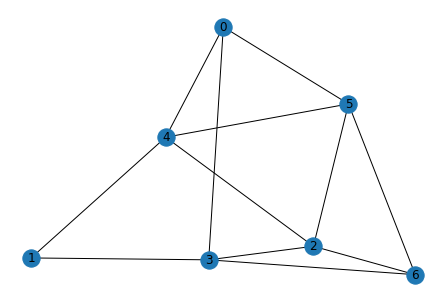

In [480]:
nx.draw(graph, with_labels=True)
plt.show()

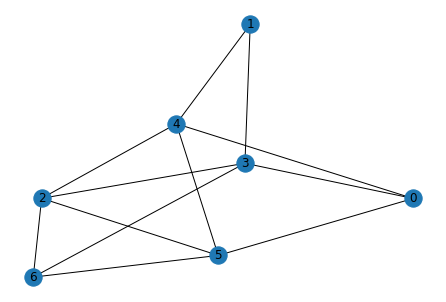

In [481]:
nx.draw(graph_test[0], with_labels=True)
plt.show()

in pick connected component new
<class 'networkx.classes.graph.Graph'>
<class 'list'>


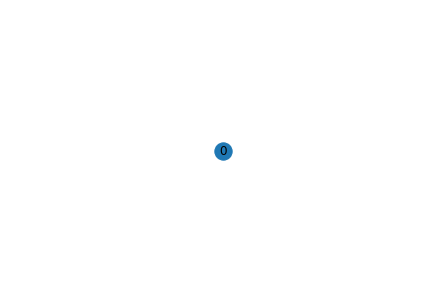

In [483]:
graph_new = pick_connected_component_new(graph_test[0])
nx.draw(graph_new, with_labels=True)
plt.show()

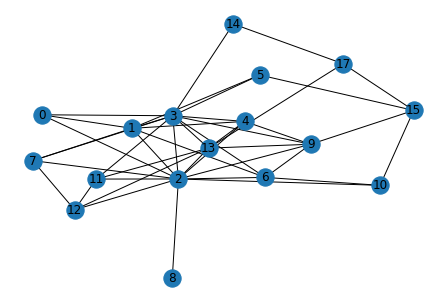

In [485]:
nx.draw(rnn_pred_rf[1], with_labels=True)
plt.show()

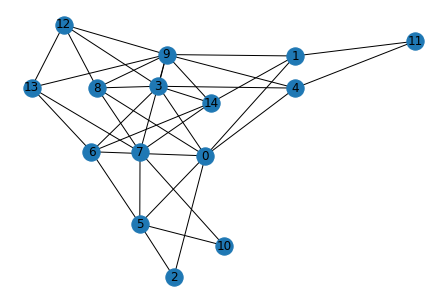

In [490]:
nx.draw(dgmg_pred_graphs_rf[4], with_labels=True)
plt.show()

In [494]:
c=0
for g in dgmg_pred_graphs_rf:
    if len(g.nodes()) == 1:
        c+=1
print(c)

131


In [519]:
c=0
for g in rnn_pred_rf:
    if len(g.nodes()) == 4:
        c+=1
print(c)

57


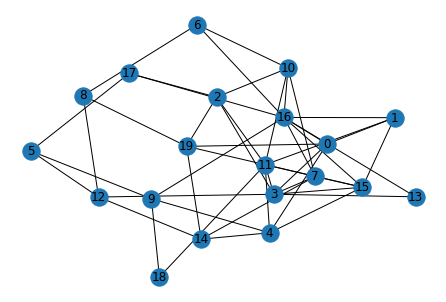

In [497]:
nx.draw(dgmg_pred_graphs[0], with_labels=True)
plt.show()

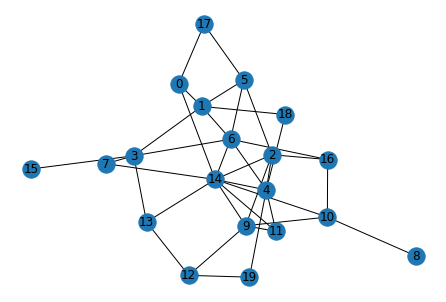

In [498]:
nx.draw(dgmg_pred_graphs[1], with_labels=True)
plt.show()

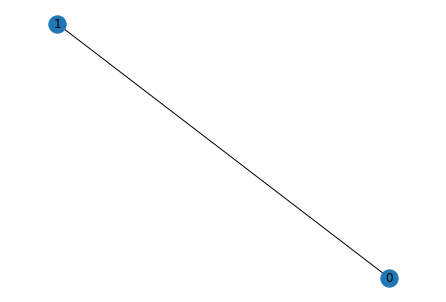

In [512]:
graph_new = pick_connected_component_new_2(dgmg_pred_graphs[0])
nx.draw(graph_new, with_labels=True)
plt.show()

in pick connected component new
<class 'networkx.classes.graph.Graph'>
<class 'list'>


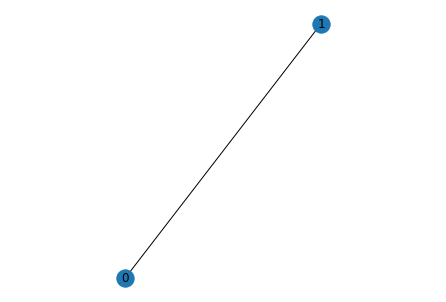

In [514]:
graph_new = pick_connected_component_new(dgmg_pred_graphs[0])
nx.draw(graph_new, with_labels=True)
plt.show()

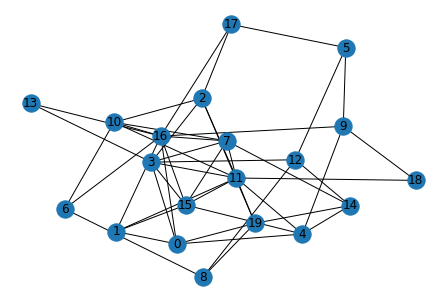

In [511]:
graph = max(nx.connected_component_subgraphs(dgmg_pred_graphs[0]), key=len)
graph =  nx.convert_node_labels_to_integers(graph)
nx.draw(graph, with_labels=True)
plt.show()

In [562]:
# load pred graphs
dgmg_pred_graphs = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/Baseline_DGMG_barabasi_small_64_pred_1100.dat")
rnn_pred_rf = load_graph_list_new("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_pred_1500_1.dat")
#vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baseline_pred_graphs/barabasi_vae_0.dat")

# test graphs
clean_test_list=[]
clean_test_dict={}
sample_10=[]
count =0
for i in range(17):
    sample_10 = random.sample(graph_test,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_test_list.append(deg)
            c = Counter(clean_test_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_test_dict.update(sorted_dict)
        
clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
test_final_clean = []
for k,v in clean_test_mean.items():
    for i in range(round(v)):
        test_final_clean.append(k)
        
# # vae graphs
# clean_vae_list=[]
# clean_vae_dict={}
# count =0
# for i in range(17):
#     sample_10 = random.sample(vae_pred,k=10)
#     for g in sample_10:
#         for _,deg in g.degree():
#             clean_vae_list.append(deg)
#             c = Counter(clean_vae_list)
#             sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
#         clean_vae_dict.update(sorted_dict)
        
# clean_vae_mean = {k:v/17 for k,v in clean_vae_dict.items()}
# pred_vae_clean = []
# for k,v in clean_vae_mean.items():
#     for i in range(round(v)):
#         pred_vae_clean.append(k)

# dgmg graphs
clean_dgmg_list=[]
clean_dgmg_dict={}
sample_10=[]
for i in range(20):
    sample_10 = random.sample(dgmg_pred_graphs,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_dgmg_list.append(deg)
            c = Counter(clean_dgmg_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_dgmg_dict.update(sorted_dict)
        
clean_dgmg_mean = {k:v/20 for k,v in clean_dgmg_dict.items()}
pred_dgmg_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_dgmg_clean.append(k)


# rnn graphs
clean_pred_list=[]
clean_pred_dict={}
sample_10=[]
for i in range(100):
    sample_10 = random.sample(rnn_pred_rf,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_pred_list.append(deg)
            c = Counter(clean_pred_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_pred_dict.update(sorted_dict)
        
clean_pred_mean = {k:v/100 for k,v in clean_pred_dict.items()}
pred_final_clean = []
for k,v in clean_pred_mean.items():
    for i in range(round(v)):
        pred_final_clean.append(k)
        
hist_data = [test_final_clean,pred_final_clean,pred_dgmg_clean]
fig = ff.create_distplot(hist_data,['Real','GraphRNN','DeepGMG'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [535]:
vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baseline_pred_graphs/barabasi_vae_0.dat")

In [547]:
c=0
for g in vae_pred:
    if len(g.nodes()) ==20:
        c+=1
print(c)

170


In [548]:
len(vae_pred)

170

In [1115]:
# vae graphs
vae_pred = load_graph_list_new("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_new_0.dat")
clean_vae_list=[]
clean_vae_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(vae_pred,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_vae_list.append(deg)
            c = Counter(clean_vae_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_vae_dict.update(sorted_dict)
        
clean_vae_mean = {k:v/17 for k,v in clean_vae_dict.items()}
pred_vae_clean = []
for k,v in clean_vae_mean.items():
    for i in range(round(v)):
        pred_vae_clean.append(k)
        
hist_data = [pred_vae_clean]
fig = ff.create_distplot(hist_data,['VAE'],show_hist=False)
fig['layout'].update(title='Degree Distribution')
iplot(fig)

In [572]:
x=[1,2,3]
y=[5,6,7]
for i in range(2):
    y.extend(x)

In [573]:
print(y)

[5, 6, 7, [1, 2, 3], [1, 2, 3]]


In [1111]:
nevae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/nevae_barabasi_pred.dat")

In [1128]:
vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_new_3.dat")

In [1129]:
len(vae_pred)

136

In [1138]:
vae_pred_old = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_old_0.dat")

In [1139]:
len(vae_pred_old)

170

In [1141]:
#vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_old_0.dat")
# print(len(vae_pred))
clean_nevae_list=[]
clean_nevae_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(vae_pred_old,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_nevae_list.append(deg)
            c = Counter(clean_nevae_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_nevae_dict.update(sorted_dict)
# print(clean_nevae_list)  
clean_nevae_mean = {k:v/17 for k,v in clean_nevae_dict.items()}
print(clean_nevae_dict)
pred_nevae_clean = []
for k,v in clean_nevae_mean.items():
    for i in range(round(v)):
        pred_nevae_clean.append(k)
print(pred_nevae_clean)
hist_data = [pred_nevae_clean]



fig = ff.create_distplot(hist_data,['NeVAE'],show_hist=False, show_rug=False)
fig['layout'].update(
#     title=go.layout.Title(
#         text="Plot Title",
#         xref="paper",
#         x=0
#     ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="degree",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"  #"rgb(159, 197, 232)"
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="mean frequency distribution",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
          
        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"
    ),
    
      legend=go.layout.Legend(
        x=0.80,
        y=0.92,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2,
    ),
    #margin=dict(l=30, r=30, t=30, b=30)
)

# import plotly as plotly
# plotly.io.write_image(fig, file='degree_dist.png', format='png')
iplot(fig)



{3: 323, 1: 273, 7: 90, 6: 143, 4: 291, 2: 415, 5: 181, 8: 51, 9: 45, 11: 10, 10: 19, 12: 2, 14: 1}
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 9, 9, 9, 11, 10]


In [1178]:
#vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_new_3.dat")
# print(len(vae_pred))
clean_nevae_list=[]
clean_nevae_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(nevae_pred,k=10)
    for g in sample_10:
        for c_doeff in nx.clustering(g).values():
            clean_nevae_list.append(c_doeff)
            c = Counter(clean_nevae_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_nevae_dict.update(sorted_dict)
print(clean_nevae_list)  
clean_nevae_mean = {k:v/17 for k,v in clean_nevae_dict.items()}
#print(clean_nevae_dict)
pred_nevae_clean = []
for k,v in clean_nevae_mean.items():
    for i in range(round(v)):
        pred_nevae_clean.append(k)
#print(pred_nevae_clean)
hist_data = [pred_nevae_clean]




fig = ff.create_distplot(hist_data,['NeVAE'],show_hist=False, show_rug=False)
fig['layout'].update(
#     title=go.layout.Title(
#         text="Plot Title",
#         xref="paper",
#         x=0
#     ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="degree",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"  #"rgb(159, 197, 232)"
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="mean frequency distribution",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
          
        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"
    ),
    
      legend=go.layout.Legend(
        x=0.80,
        y=0.92,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2,
    ),
    #margin=dict(l=30, r=30, t=30, b=30)
)

# import plotly as plotly
# plotly.io.write_image(fig, file='degree_dist.png', format='png')
iplot(fig)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

LinAlgError: singular matrix

In [7]:
import plotly as plotly

In [714]:
plotly.io.orca.config.executable = '/home/rachneet/PycharmProjects/graph_generation/eval/orca/'

In [715]:
#plotly.io.write_image(fig, file='degree_dist.png', format='png')

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable '/home/rachneet/PycharmProjects/graph_generation/eval/orca/' on the following path:
    /usr/local/cuda-9.0/bin
    /home/rachneet/anaconda3/bin
    /usr/local/sbin
    /usr/local/bin
    /usr/sbin
    /usr/bin
    /sbin
    /bin
    /usr/games
    /usr/local/games
    /snap/bin}

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca.

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [8]:
def draw_degree_dist(graph_list, num_graphs, model_name,colors):
    hist_data=[]
    for val in range(len(graph_list)):
      
        iterations = int(num_graphs[val]/10)
        clean_test_list=[]
        clean_test_dict={}
        sample_10=[]
        test_final_clean = []
        clean_test_mean ={}
        c=0
        
        for i in range(iterations):
            sample_10 = random.sample(graph_list[val],k=10)
            for g in sample_10:
                for _,deg in g.degree():
                    clean_test_list.append(deg)
                    c = Counter(clean_test_list)
                    sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
                clean_test_dict.update(sorted_dict)

        clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}

        for k,v in clean_test_mean.items():
            for i in range(round(v)):
                test_final_clean.append(k)
        #print(test_final_clean)
                
        hist_data.append(test_final_clean)
        
    fig = ff.create_distplot(hist_data,model_name,show_hist=False,show_rug=False,colors=colors)
    return fig['data']
    #fig['layout'].update(title='Degree Distribution')
#     fig['layout'].update(
# #     title=go.layout.Title(
# #         text="Plot Title",
# #         xref="paper",
# #         x=0
# #     ),
#     xaxis=go.layout.XAxis(
#         title=go.layout.xaxis.Title(
#             text="degree",
#             font=dict(
#                 family="sans-serif",
#                 size=18,
#                 #color="#7f7f7f"
#             )
#         ),
#         mirror =True,
#         showline=True,
#         ticks='inside',
#         tick0=0,
#         gridcolor = "Black"  #"rgb(159, 197, 232)"
#     ),
#     yaxis=go.layout.YAxis(
#         title=go.layout.yaxis.Title(
#             text="mean frequency distribution",
#             font=dict(
#                 family="sans-serif",
#                 size=18,
#                 #color="#7f7f7f"
#             )

#         ),
#         mirror =True,
#         showline=True,
#         ticks='inside',
#         tick0=0,
#         gridcolor = "Black"
#     ),

#       legend=go.layout.Legend(
#         x=0.80,
#         y=0.92,
#         traceorder="normal",
#         font=dict(
#             family="sans-serif",
#             size=12,
#             color="black"
#         ),
#         bgcolor="white",
#         bordercolor="Black",
#         borderwidth=2,
#     )
# )
#     iplot(fig)

In [12]:
# graph_list=[graph_test,nevae_pred,dgmg_pred_graphs,rnn_pred_rf] 
# num_graphs=[170,170,200,1000]
# model_name =["Real","NeVAE","DeepGMG","GraphRNN"]
# draw_degree_dist(graph_list, num_graphs, model_name)
graph_list=[graph_test,rnn_pred_rf] 
num_graphs=[170,1000]
model_name =["Real","GraphRNN"]
draw_degree_dist(graph_list, num_graphs, model_name)

NameError: name 'graph_test' is not defined

In [582]:
graph_list=[graph_test,nevae_pred,dgmg_pred_graphs,rnn_pred_rf] 
num_graphs=[170,170,200,1000]
model_name =["Real","NeVAE","DeepGMG","GraphRNN"]
draw_degree_dist(graph_list, num_graphs, model_name)

In [583]:
graph_list=[graph_test,nevae_pred,dgmg_pred_graphs,rnn_pred_rf] 
num_graphs=[170,170,200,1000]
model_name =["Real","NeVAE","DeepGMG","GraphRNN"]
draw_degree_dist(graph_list, num_graphs, model_name)

In [ ]:
for i in range(len(graph_pred)):
    clustering_coeff_real = list(nx.clustering(graph_test[i]).values())
    clustering_coeff_pred = list(nx.clustering(graph_pred[i]).values())

In [584]:
nx.clustering(graph_test[0]).values()

dict_values([0.3333333333333333, 0, 0.5, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666])

In [585]:
for _,deg in graph_test[0].degree():
    print(deg)

3
2
4
4
4
4
3


In [586]:
for c in nx.clustering(graph_test[0]).values():
    print(c)

0.3333333333333333
0
0.5
0.16666666666666666
0.3333333333333333
0.5
0.6666666666666666


In [9]:
def draw_clustering_dist(graph_list, num_graphs, model_name,colors):
    hist_data=[]
    for val in range(len(graph_list)):
       
        iterations = int(num_graphs[val]/10)
        clean_test_list=[]
        clean_test_dict={}
        sample_10=[]
        test_final_clean = []
        clean_test_mean ={}
        c=0
        
        for i in range(iterations):
            sample_10 = random.sample(graph_list[val],k=10)
            for g in sample_10:
                for c_doeff in nx.clustering(g).values():
                    clean_test_list.append(c_doeff)
                    c = Counter(clean_test_list)
                    sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
                clean_test_dict.update(sorted_dict)
                # print(clean_test_dict)
        clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
#         print("clean_test_mean",clean_test_mean)
#         print("len of clean_test_mean",len(clean_test_mean)
        for k,v in clean_test_mean.items():
            #print("v:",round(v))
            for i in range(round(v)):
                test_final_clean.append(k)
        #print(test_final_clean)       
        hist_data.append(test_final_clean)
        
    fig = ff.create_distplot(hist_data,model_name,show_hist=False,show_rug=False,colors=colors)
    fig.update(layout_showlegend=False)
    return fig['data']
#     fig['layout'].update(title='Clustering Coefficients Distribution')
#     fig['layout'].update(
# #     title=go.layout.Title(
# #         text="Plot Title",
# #         xref="paper",
# #         x=0
# #     ),
#     xaxis=go.layout.XAxis(
#         title=go.layout.xaxis.Title(
#             text="clustering coefficient",
#             font=dict(
#                 family="sans-serif",
#                 size=18,
#                 #color="#7f7f7f"
#             )
#         ),
#         mirror =True,
#         showline=True,
#         ticks='inside',
#         tick0=0,
#         gridcolor = "Black"  #"rgb(159, 197, 232)"
#     ),
#     yaxis=go.layout.YAxis(
#         title=go.layout.yaxis.Title(
#             text="mean frequency distribution",
#             font=dict(
#                 family="sans-serif",
#                 size=18,
#                 #color="#7f7f7f"
#             )

#         ),
#         mirror =True,
#         showline=True,
#         ticks='inside',
#         tick0=0,
#         gridcolor = "Black"
#     ),

#       legend=go.layout.Legend(
#         x=0.80,
#         y=0.92,
#         traceorder="normal",
#         font=dict(
#             family="sans-serif",
#             size=12,
#             color="black"
#         ),
#         bgcolor="white",
#         bordercolor="Black",
#         borderwidth=2,
#     )
# )
#     #fig.write_image("cc.png")
#     iplot(fig)

In [880]:
graph_list=[graph_test,dgmg_pred_graphs,rnn_pred_rf] 
num_graphs=[170,200,1000]
model_name =["Real","DeepGMG","GraphRNN"]
colors = ['#1f77b4', #muted blue
                           '#2ca02c',  # cooked asparagus green
                           '#d62728']  #brick red
draw_clustering_dist(graph_list, num_graphs, model_name,colors)

TypeError: create_distplot() got an unexpected keyword argument 'legend'

In [595]:
for i in range(len(graph_test)):
    clustering_coeff_real = list(nx.clustering(graph_test[i]).values())
    clustering_coeff_pred = list(nx.clustering(nevae_pred[i]).values())
    
print(len(clustering_coeff_pred),len(clustering_coeff_real))
cluster_hist = [clustering_coeff_real,clustering_coeff_pred]
df_clustering = pd.DataFrame()
df_clustering['Real']= clustering_coeff_real
df_clustering['NeVAE'] = clustering_coeff_pred
fig = ff.create_distplot([df_clustering[c] for c in df_clustering.columns],["Real","GraphRNN"],show_hist=False)
fig['layout'].update(title='Clustering Coefficient')
iplot(fig)

20 18


ValueError: Length of values does not match length of index

In [596]:
len(graph_test)

170

In [638]:
list(nx.clustering(nevae_pred[0]).values())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [737]:
plotly.offline.plot(fig, filename='test', image='svg')

/home/rachneet/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `test` didn't end with .html. Adding .html to the end of your file.



'test.html'

In [10]:
## code for saving plotly images in high quality

import os
import plotly
import plotly.graph_objs as go
import time
from shutil import copyfile

def save_plot(figure, plot_name):
    img_name = plot_name
    dload = os.path.expanduser('~/Downloads')
    save_dir = '/home/rachneet/PycharmProjects'


    # data = [go.Scatter(x=[1, 2, 3], y=[3, 2, 6])]

    plotly.offline.plot(figure, image_filename=img_name, image='svg')

    ### might need to wait for plot to download before copying
    time.sleep(5)

    copyfile('{}/{}.svg'.format(dload, img_name),
             '{}/{}.svg'.format(save_dir, img_name))

In [20]:
clean_nevae_list=[]
clean_nevae_dict={}
count =0
for i in range(17):
    sample_10 = random.sample(nevae_pred,k=10)
    for g in sample_10:
        for _,deg in g.degree():
            clean_nevae_list.append(deg)
            c = Counter(clean_nevae_list)
            sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
        clean_nevae_dict.update(sorted_dict)
        
clean_nevae_mean = {k:v/17 for k,v in clean_nevae_dict.items()}
pred_nevae_clean = []
for k,v in clean_nevae_mean.items():
    for i in range(round(v)):
        pred_nevae_clean.append(k)
        
hist_data = [pred_nevae_clean]



fig = ff.create_distplot(hist_data,['NeVAE'],show_hist=False, show_rug=False)
fig2 = ff.create_distplot(hist_data,['NeVAE'],show_hist=False, show_rug=False)
fig2.update(layout_showlegend=False)


fig2['layout'].update(
#     title=go.layout.Title(
#         text="Plot Title",
#         xref="paper",
#         x=0
#     ),
    xaxis1=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="degree",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
        ),
        anchor = "y2",
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0
        #gridcolor = "gray"  #"rgb(159, 197, 232)"
    ),
    yaxis1=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="mean frequency distribution",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
          
        ),
        anchor ="x1",
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "darkgrey"
    ),
    
    yaxis2=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="mean frequency distribution",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
          
        ),
        anchor ="x1",
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "darkgrey"
    ),
    
      legend=go.layout.Legend(
        x=0.80,
        y=0.92,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        #bordercolor="Black",
        borderwidth=2,
    ),
    #margin=dict(l=30, r=30, t=30, b=30)
)

# import plotly as plotly
# plotly.io.write_image(fig, file='degree_dist.png', format='png')

distplot2 = fig2['data']
distplot1 = fig['data']

iplot(fig2)



In [50]:
graph_test = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_test_0.dat")
rnn_pred_rf = load_graph_list_new("/home/rachneet/PycharmProjects/graph_generation/graphs/GraphRNN_RNN_barabasi_small_4_64_pred_1500_1.dat")
# dgmg_pred_graphs = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/Baseline_DGMG_barabasi_small_64_pred_1100.dat")
# nevae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/graphs/nevae_barabasi_pred.dat")
# vae_pred = load_graph_list("/home/rachneet/PycharmProjects/graph_generation/baselines/graphvae/graphs/barabasi_small_vae_new_3.dat")

In [51]:
# graph_list=[graph_test,vae_pred,nevae_pred,dgmg_pred_graphs,rnn_pred_rf] 
# num_graphs=[170,136,170,200,1000]
# model_name =["Real","GraphVAE","NeVAE","DeepGMG","GraphRNN"]
graph_list=[graph_test,rnn_pred_rf] 
num_graphs=[170,1000]
model_name =["Real","GraphRNN"]
colors = ['#1f77b4', #muted blue
#           '#9467bd',  # muted purple
#                            '#ff7f0e',  # safety orange
#                            '#2ca02c',  # cooked asparagus green
                           '#d62728']  #brick red
degree_dist = draw_degree_dist(graph_list, num_graphs, model_name,colors)

colors = ['#1f77b4', #muted blue
#           '#9467bd',  # muted purple
#                            '#2ca02c',  # cooked asparagus green
                           '#d62728']  #brick red
# graph_list=[graph_test,vae_pred,dgmg_pred_graphs,rnn_pred_rf] 
# num_graphs=[170,136,200,1000]
# model_name =["Real","GraphVAE","DeepGMG","GraphRNN"]
graph_list=[graph_test,rnn_pred_rf] 
num_graphs=[170,1000]
model_name =["Real","GraphRNN"]
cluster_dist = draw_clustering_dist(graph_list, num_graphs, model_name,colors)

In [52]:
import plotly.tools as tls
my_fig = tls.make_subplots( #subplot_titles=('Title1', 'Title2'),
    specs=[[{}], [{}]],                       
    rows=2,
    cols=1
    )

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [53]:
# for trace in degree_dist:
#     print(trace.name)
#     if trace.name == 'Real' or trace.name=='GraphRNN':
# # /*or trace.name=='DeepGMG'or trace.name=='GraphRNN' or trace.name=='NeVAE'*:
#         trace.showlegend=False

for trace in cluster_dist:
    print(trace.name)
    if trace.name == 'Real' or trace.name=='GraphRNN':
#         or trace.name=='DeepGMG' or trace.name=='GraphVAE':
        trace.showlegend=False

Real
GraphRNN


In [54]:
my_fig.append_trace(degree_dist[0], 1, 1)
my_fig.append_trace(degree_dist[1], 1, 1)
# my_fig.append_trace(degree_dist[2], 1, 1)
# my_fig.append_trace(degree_dist[3], 1, 1)
# my_fig.append_trace(degree_dist[4], 1, 1)
my_fig.append_trace(cluster_dist[0], 2, 1)
my_fig.append_trace(cluster_dist[1], 2, 1)
# my_fig.append_trace(cluster_dist[2], 2, 1
# my_fig.append_trace(cluster_dist[3], 2, 1)

my_fig['layout'].update({'xaxis1' : {'zeroline': False,'showline':True,'mirror':True,'gridcolor':'lightgrey',
                                     'title':{'text':'degree', 'font':{'color':'Black','size':14}},'color':'Black',
                                     'tickfont':{'size':13}, 'ticks':'outside','dtick':3}})
my_fig['layout'].update({'xaxis2' : {'zeroline': False,'showline':True,'mirror':True,'gridcolor':'lightgrey',
                                    'title':{'text':'clustering coefficient', 'font':{'color':'Black','size':14}},
                                     'color':'Black',
                                     'tickfont':{'size':13}, 'ticks':'outside'}})
my_fig['layout'].update({'yaxis1' : {'zeroline': False,'showline':True,'mirror':True,'gridcolor':'lightgrey',
                                    'title':{'text':'probability density', 'font':{'color':'Black','size':14}},
                                     'color':'Black',
                                     'tickfont':{'size':13}, 'ticks':'outside'}})
my_fig['layout'].update({'yaxis2' : {'zeroline': False,'showline':True,'mirror':True,'gridcolor':'lightgrey',
                                    'title':{'text':'probability density', 'font':{'color':'Black','size':14}},
                                     'color':'Black',
                                     'tickfont':{'size':13}, 'ticks':'outside'}})
my_fig['layout'].update(height=800, width=500)
my_fig['layout'].update({'legend': {'traceorder':'normal','bgcolor':"white",'bordercolor':"lightgrey",
                                    'borderwidth':1,'x':0.60,'y':0.97,'font':{'color':'Black', 'size':14}}})


#x=0.80,
#         y=0.92,
#         traceorder="normal",
#         font=dict(
#             family="sans-serif",
#             size=12,
#             color="black"
#         ),
#         bgcolor="white",
#         bordercolor="Black",
#         borderwidth=2,

# 'x':0.80,'y':0.20,
# 'x':0.65,'y':0.25
# 'x':0.60,'y':0.97

Layout({
    'height': 800,
    'legend': {'bgcolor': 'white',
               'bordercolor': 'lightgrey',
               'borderwidth': 1,
               'font': {'color': 'Black', 'size': 14},
               'traceorder': 'normal',
               'x': 0.6,
               'y': 0.97},
    'width': 500,
    'xaxis': {'anchor': 'y',
              'color': 'Black',
              'domain': [0.0, 1.0],
              'dtick': 3,
              'gridcolor': 'lightgrey',
              'mirror': True,
              'showline': True,
              'tickfont': {'size': 13},
              'ticks': 'outside',
              'title': {'font': {'color': 'Black', 'size': 14}, 'text': 'degree'},
              'zeroline': False},
    'xaxis2': {'anchor': 'y2',
               'color': 'Black',
               'domain': [0.0, 1.0],
               'gridcolor': 'lightgrey',
               'mirror': True,
               'showline': True,
               'tickfont': {'size': 13},
               'ticks': 'outside',

In [55]:
plotly.offline.iplot(my_fig)

In [56]:
save_plot(my_fig,"dist_cluster_reduced_2")

In [784]:
my_fig['layout'].update({'xaxis2' : {'zeroline': False}})
iplot(my_fig)

In [954]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

fichier_html_graphs=open("DASHBOARD.html",'w')
fichier_html_graphs.write("<html><head></head><body>"+"\n")

i=0
while 1:
    if i<=1:
        i=i+1


        #______________________________--Plotly--______________________________________


        color1 = '#00bfff'
        color2 = '#ff4000'

        trace1 = go.Bar(
            x = ['2017-09-25','2017-09-26','2017-09-27','2017-09-28','2017-09-29','2017-09-30','2017-10-01'],
            y = [25,100,20,7,38,170,200],
            name='Debit',
            marker=dict(
                color=color1
            )

        )
        trace2 = go.Scatter(

            x=['2017-09-25','2017-09-26','2017-09-27','2017-09-28','2017-09-29','2017-09-30','2017-10-01'],
            y = [3,50,20,7,38,60,100],
            name='Taux',
            yaxis='y2'

        )
        data = [trace1, trace2]
        layout = go.Layout(
            title= ('Chart Number: '+str(i)),
            titlefont=dict(
            family='Courier New, monospace',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',

            yaxis=dict(
                title='Bandwidth Mbit/s',
                titlefont=dict(
                    color=color1
                ),
                tickfont=dict(
                    color=color1
                )
            ),
            yaxis2=dict(
                title='Ratio %',
                overlaying='y',
                side='right',
                titlefont=dict(
                    color=color2
                ),
                tickfont=dict(
                    color=color2
                )

            )

        )
        fig = go.Figure(data=data, layout=layout)
        plotly.offline.plot(fig, filename='Chart_'+str(i)+'.html',auto_open=False)
        fichier_html_graphs.write("  <object data=\""+'Chart_'+str(i)+'.html'+"\" width=\"650\" height=\"500\"></object>"+"\n")
    else:
        break

fichier_html_graphs.write("</body></html>")
print("CHECK YOUR DASHBOARD.html In the current directory")

CHECK YOUR DASHBOARD.html In the current directory


In [988]:
fichier_html_graphs=open("DASHBOARD.html",'w')
fichier_html_graphs.write("<html><head></head><body>"+"\n")

i=0
while(1):
    if i<=2:
        i+=1
        
   
        hist_data=[]
        graph_list=[graph_test,nevae_pred,dgmg_pred_graphs,rnn_pred_rf] 
        num_graphs=[170,170,200,1000]
        model_name =["Real","NeVAE","DeepGMG","GraphRNN"]
        colors = ['#1f77b4', #muted blue
                       '#ff7f0e',  # safety orange
                       '#2ca02c',  # cooked asparagus green
                       '#d62728']  #brick red
        for val in range(len(graph_list)):
            iterations = int(num_graphs[val]/10)
            clean_test_list=[]
            clean_test_dict={}
            sample_10=[]
            test_final_clean = []
            clean_test_mean ={}
            c=0

            for i in range(iterations):
                sample_10 = random.sample(graph_list[val],k=10)
                for g in sample_10:
                    for _,deg in g.degree():
                        clean_test_list.append(deg)
                        c = Counter(clean_test_list)
                        sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
                    clean_test_dict.update(sorted_dict)

            clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}

            for k,v in clean_test_mean.items():
                for i in range(round(v)):
                    test_final_clean.append(k)
            #print(test_final_clean)

            hist_data.append(test_final_clean)

        fig = ff.create_distplot(hist_data,model_name,show_hist=False,show_rug=False,colors=colors)

        fig['layout'].update(title='Degree Distribution')
        fig['layout'].update(
    #     title=go.layout.Title(
    #         text="Plot Title",
    #         xref="paper",
    #         x=0
    #     ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="degree",
                font=dict(
                    family="sans-serif",
                    size=18,
                    #color="#7f7f7f"
                )
            ),
            mirror =True,
            showline=True,
            ticks='inside',
            tick0=0,
            gridcolor = "Black"  #"rgb(159, 197, 232)"
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="mean frequency distribution",
                font=dict(
                    family="sans-serif",
                    size=18,
                    #color="#7f7f7f"
                )

            ),
            mirror =True,
            showline=True,
            ticks='inside',
            tick0=0,
            gridcolor = "Black"
        ),

          legend=go.layout.Legend(
            x=0.80,
            y=0.92,
            traceorder="normal",
            font=dict(
                family="sans-serif",
                size=12,
                color="black"
            ),
            bgcolor="white",
            bordercolor="Black",
            borderwidth=2,
        )
    )
        plotly.offline.plot(fig, filename='Chart_'+str(i)+'.html',auto_open=False)
        fichier_html_graphs.write("  <object data=\""+'Chart_'+str(i)+'.html'+"\" width=\"650\" height=\"500\"></object>"+"\n")

    
        hist_data=[]
        colors = ['#1f77b4', #muted blue
                       '#2ca02c',  # cooked asparagus green
                       '#d62728']  #brick red
        graph_list=[graph_test,dgmg_pred_graphs,rnn_pred_rf] 
        num_graphs=[170,200,1000]
        model_name =["Real","DeepGMG","GraphRNN"]
        for val in range(len(graph_list)):
            iterations = int(num_graphs[val]/10)
            clean_test_list=[]
            clean_test_dict={}
            sample_10=[]
            test_final_clean = []
            clean_test_mean ={}
            c=0

            for i in range(iterations):
                sample_10 = random.sample(graph_list[val],k=10)
                for g in sample_10:
                    for c_doeff in nx.clustering(g).values():
                        clean_test_list.append(c_doeff)
                        c = Counter(clean_test_list)
                        sorted_dict = OrderedDict(sorted(c.items(), key = lambda kv : kv[1], reverse=True))
                    clean_test_dict.update(sorted_dict)
                    # print(clean_test_dict)
            clean_test_mean = {k:v/17 for k,v in clean_test_dict.items()}
    #         print("clean_test_mean",clean_test_mean)
    #         print("len of clean_test_mean",len(clean_test_mean)
            for k,v in clean_test_mean.items():
                #print("v:",round(v))
                for i in range(round(v)):
                    test_final_clean.append(k)
            #print(test_final_clean)       
            hist_data.append(test_final_clean)

        fig = ff.create_distplot(hist_data,model_name,show_hist=False,show_rug=False,colors=colors)
        #fig.update(layout_showlegend=False)

        fig['layout'].update(title='Clustering Coefficients Distribution')
        fig['layout'].update(
        #     title=go.layout.Title(
        #         text="Plot Title",
        #         xref="paper",
        #         x=0
        #     ),
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="clustering coefficient",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )
        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"  #"rgb(159, 197, 232)"
        ),
        yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="mean frequency distribution",
            font=dict(
                family="sans-serif",
                size=18,
                #color="#7f7f7f"
            )

        ),
        mirror =True,
        showline=True,
        ticks='inside',
        tick0=0,
        gridcolor = "Black"
        ),

        legend=go.layout.Legend(
        x=0.80,
        y=0.92,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2,
        )
        )
        #fig.write_image("cc.png")
        plotly.offline.plot(fig, filename='Chart_'+str(i)+'.html',auto_open=False)
        fichier_html_graphs.write("  <object data=\""+'Chart_'+str(i)+'.html'+"\" width=\"650\" height=\"500\"></object>"+"\n")
        
    else:
        break
fichier_html_graphs.write("</body></html>")
print("CHECK YOUR DASHBOARD.html In the current directory")

KeyboardInterrupt: 